Assignment 2

Problem Statement


A random sample of loans obtained from a peer-to-peer
lending platform with the goal to predict who will default at its loan using features provided in the
data.
trainData: This is the dataset on which you will train all your models.
testData: This is the dataset on which you will evaluate your model’s fit.
varDescription: This contains a description of the features


This task requires estimating several models to identify the best model to predict default based on the
available data.
Create a new variable from trainData called “y” which takes the value = 1 if the column “loan status”
has the value “Charged Off” and 0 otherwise. All other variables provided to you other than the loan
status are features or “predictors”. Consider whether you would like to transform your variables; for
example, consider convrting some of the categorical variables into a continuous variable.


We have Customer Data from the Loan Department which gives us details about the customers Income,Employment Status, Type of Loan Account, Credit liablity,Living Status and also provide the status of the Loan Repayment. We are suppose to create a preditive model which can take decision on the basis of the given information to predict if the customer will be able to repay the loans or will default.

Creating a predictive model requires the below Steps :

1)Data Collection(Already Provided)

2)Exploring and Analysing the Data.

3)Performing Data Cleaning.

4)Feature Extraction and Feature Selection.

5)Training Preditive Model.

6)Evaluation of predivitve model.


In [51]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

Data was loaded from the CSV to Pandas DataFrame

In [5]:
#Loading the data
train_data=pd.read_csv("trainData.csv")
test_df=pd.read_csv("testData.csv")
train_df = train_data.copy()

In [6]:
# Was added to view all the column on the screen
pd.set_option('display.max_columns', 33)

## Data Analysis

I got all the Information of the data type of the columns and null values which will help in performing the data cleaning.
While Exploring the data I found that we had 26 numerical features and 5 Categorical features.

In [7]:
#Getting all the info about the training Data.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226067 entries, 0 to 226066
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          0 non-null       float64
 1   member_id                   0 non-null       float64
 2   loan_amnt                   226067 non-null  int64  
 3   int_rate                    226067 non-null  float64
 4   installment                 226067 non-null  float64
 5   grade                       226067 non-null  object 
 6   emp_length                  211456 non-null  object 
 7   home_ownership              226067 non-null  object 
 8   annual_inc                  226067 non-null  float64
 9   loan_status                 226067 non-null  object 
 10  dti                         225887 non-null  float64
 11  delinq_2yrs                 226062 non-null  float64
 12  inq_last_6mths              226062 non-null  float64
 13  mths_since_las

No Duplicate Data was Found.

In [8]:
#finidng Duplicates in the Dataframe
train_df[train_df.duplicated()]

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


Further Analysis to find out number of null values each column had.
Id and Member Id were completely null.
mths_since_last_delinq has more than 50 % null value

In [9]:
test_df.isna().sum()

id                            226067
member_id                     226067
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14799
home_ownership                     0
annual_inc                         1
loan_status                        0
dti                              174
delinq_2yrs                        5
inq_last_6mths                     6
mths_since_last_delinq        115999
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       159
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
c

In [10]:
#Finiding columns the missing values in the data 14 columns
nan_columns=train_df.columns[train_df.isna().sum()>0]
print(pd.DataFrame(nan_columns))

                             0
0                           id
1                    member_id
2                   emp_length
3                          dti
4                  delinq_2yrs
5               inq_last_6mths
6       mths_since_last_delinq
7                     open_acc
8                      pub_rec
9                   revol_util
10                   total_acc
11  collections_12_mths_ex_med
12              acc_now_delinq
13                tot_coll_amt
14                 tot_cur_bal
15            total_rev_hi_lim


Created Histogram for each feature to find the data distribution.

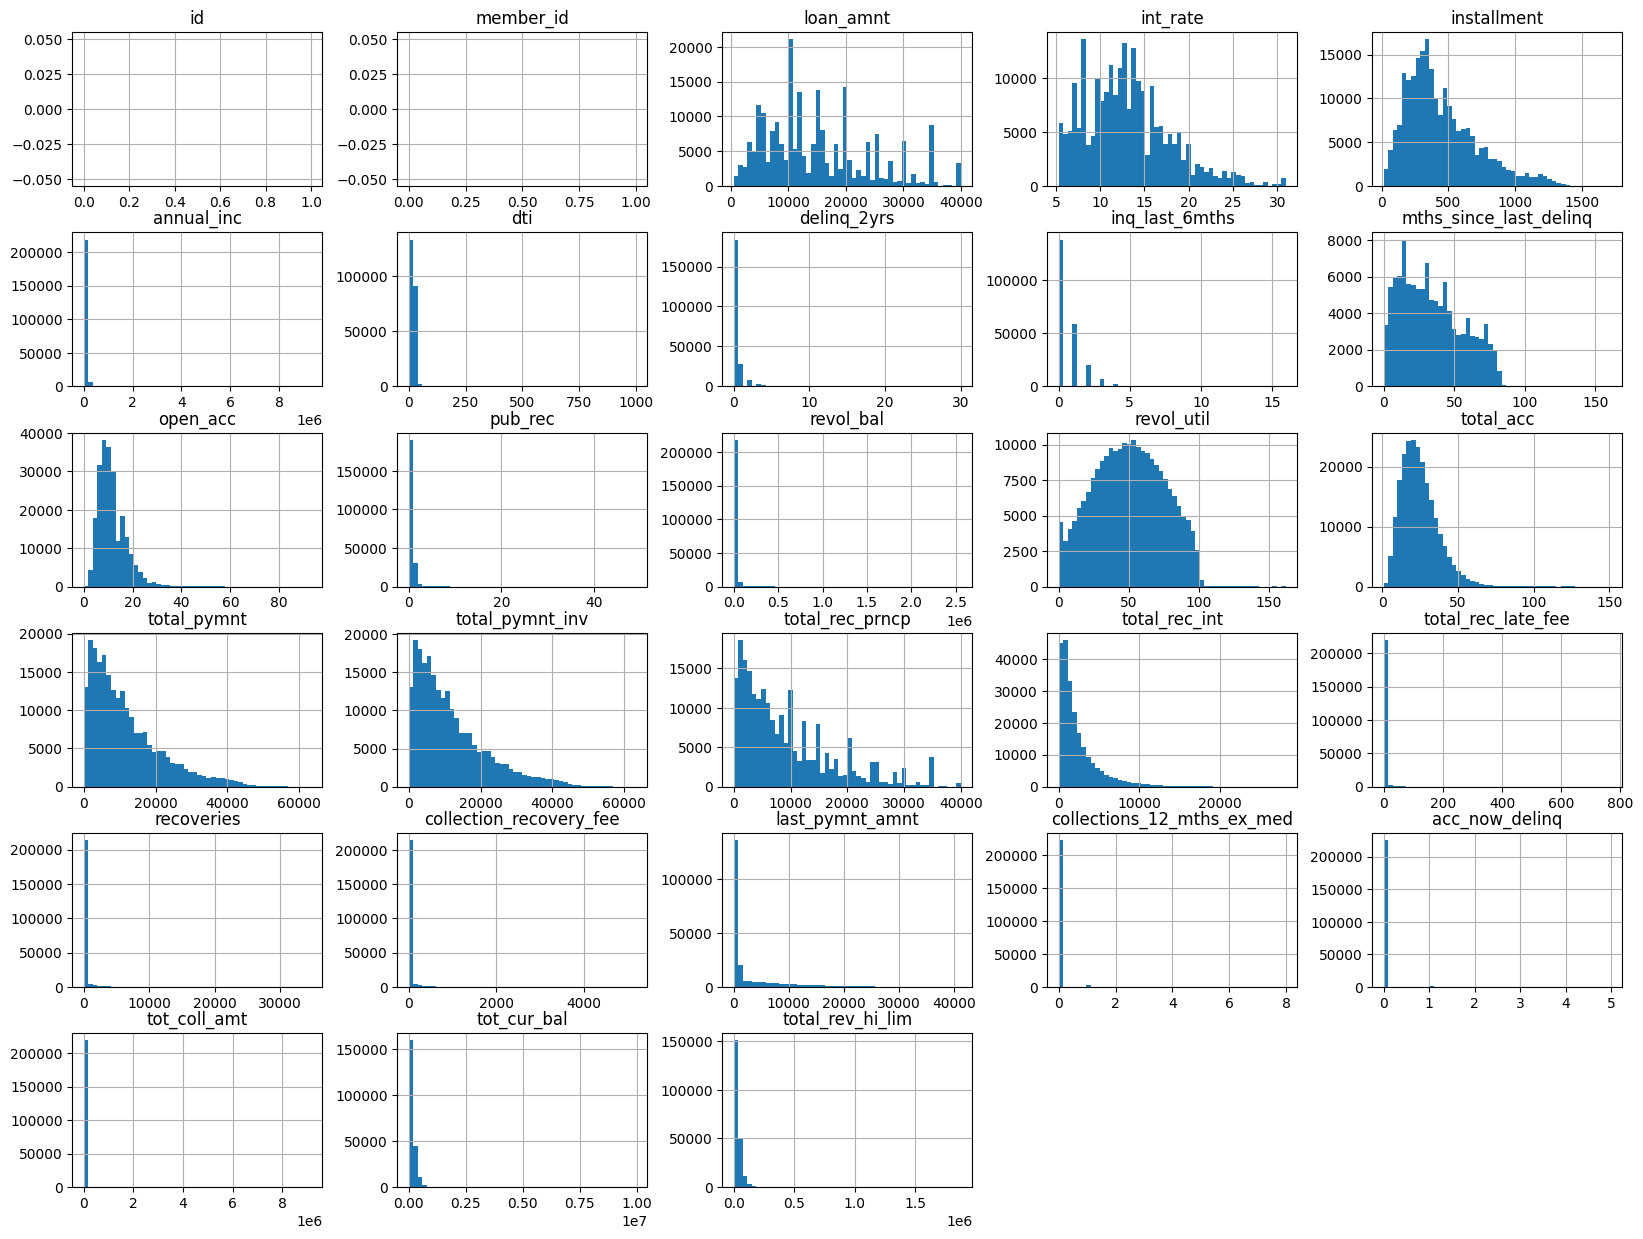

In [11]:
_=train_df.select_dtypes(include=['int64','float64']).hist(bins=50, figsize=(20,15))

I explored the dependent variable had figured out different status and decided to merge the similar status.

Changed 'Does not meet the credit policy. Status:Charged Off' to Charged off.

Changed 'Does not meet the credit policy. Status:Fully Paid to charged off' as well

Class Imbalance was also noticed.

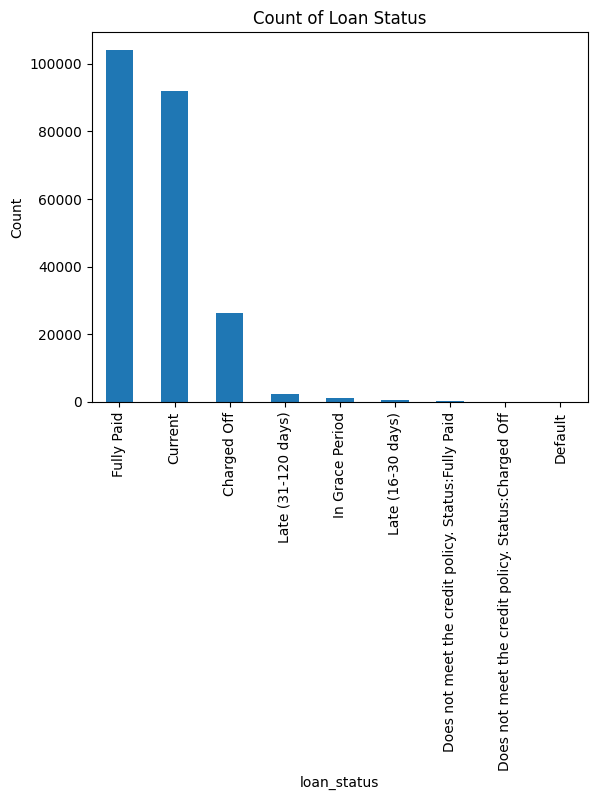

In [12]:
#Exploaring the different values in the Loan Status Column
loanstatus=train_df['loan_status'].value_counts()

# Plot the bar plot
loanstatus.plot(kind='bar')

# Add labels and title
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('Count of Loan Status')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [13]:
##Counts of different loan Status
train_df['loan_status'].value_counts()

loan_status
Fully Paid                                             104143
Current                                                 91999
Charged Off                                             26102
Late (31-120 days)                                       2215
In Grace Period                                           955
Late (16-30 days)                                         386
Does not meet the credit policy. Status:Fully Paid        201
Does not meet the credit policy. Status:Charged Off        60
Default                                                     6
Name: count, dtype: int64

In [14]:
#Replacing the Does not meet the credit policy. Status:Charged Off to Charged off to maintain the Status Similarity

train_df.replace({'loan_status':'Does not meet the credit policy. Status:Charged Off'},'Charged Off', inplace=True)

In [15]:
#Replacing the Does not meet the credit policy. Status:Fully Paid to Charged of as it suggests that they are dont meet the credit policy

train_df.replace({'loan_status':'Does not meet the credit policy. Status:Fully Paid'},'Charged Off', inplace=True)

Dropped the Columns with maximum null values as the prediction models dont accept null values.

In [16]:
## Dropping columns with max number of missing Values

train_df.drop(columns=['id','member_id','mths_since_last_delinq'],inplace=True)

Removed the rows with the maximum null values

In [17]:
## Dropping Rows with max number of missing Values

def rows_with_max_nulls(train_df):
    max_nulls = -1
    max_nulls_indices = []

    for index, row in train_df.iterrows():
        null_count = row.isnull().sum()
        if null_count > max_nulls:
            max_nulls = null_count
            max_nulls_indices = [index]
        elif null_count == max_nulls:
            max_nulls_indices.append(index)

    return max_nulls_indices

rows_with_max_nulls_indices = rows_with_max_nulls(train_df)
print("Rows with maximum null values indices:", rows_with_max_nulls_indices)

train_df.drop(rows_with_max_nulls_indices,inplace=True)


Rows with maximum null values indices: [26327, 96474, 157847, 165968, 221875]


Exploring the features with null value to find out ways to fill them.

DTI:Debt to Income ratio

Set DTI to 0 for rows where dti is NaN and annual_inc is 0.0
as the annual Income is 0 we cannot calculate DTI and employment length also to 0 assuming the borrowers is unemployed and the loan is a Joint application



In [18]:
#Figuring out the reason for nan values in DTI
train_df.loc[(train_df['dti'].isna()) & (train_df['annual_inc'] == 0.0)
& (train_df['emp_length'].isna()) & (train_df['application_type'] == 'Joint App')&
(train_df['loan_status'] == 'Current') & (train_df['last_pymnt_amnt']>0.0)]

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
253,40000,13.56,921.64,C,NaN,RENT,0.0,Current,NaN,0.0,0.0,6.0,1.0,10046,41.7,16.0,6421.35,6421.35,3401.05,3020.30,0.0,0.0,0.0,921.64,0.0,Joint App,0.0,261.0,10046.0,24100.0
1730,35000,17.97,888.20,D,NaN,MORTGAGE,0.0,Current,NaN,0.0,1.0,14.0,0.0,20734,37.0,31.0,4213.89,4213.89,1875.16,2338.73,0.0,0.0,0.0,888.20,0.0,Joint App,0.0,0.0,358699.0,56100.0
3529,36000,15.04,857.20,C,NaN,RENT,0.0,Current,NaN,0.0,0.0,5.0,0.0,5066,32.1,11.0,7684.72,7684.72,3842.65,3842.07,0.0,0.0,0.0,857.20,0.0,Joint App,0.0,0.0,33823.0,15800.0
5389,8000,13.56,271.72,C,NaN,MORTGAGE,0.0,Current,NaN,0.0,0.0,8.0,0.0,13627,62.8,22.0,3262.68,3262.68,3211.83,50.85,0.0,0.0,0.0,271.72,0.0,Joint App,0.0,0.0,530990.0,21700.0
6551,24000,7.34,744.79,A,NaN,RENT,0.0,Current,NaN,0.0,1.0,18.0,0.0,15333,78.6,23.0,6693.32,6693.32,5515.48,1177.84,0.0,0.0,0.0,744.79,0.0,Joint App,0.0,0.0,270749.0,19500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216226,14000,16.91,347.26,C,NaN,MORTGAGE,0.0,Current,NaN,0.0,0.0,5.0,0.0,8725,72.7,12.0,1015.48,1015.48,456.30,559.18,0.0,0.0,0.0,347.26,0.0,Joint App,0.0,0.0,8725.0,12000.0
218407,25000,6.11,761.80,A,NaN,MORTGAGE,0.0,Current,NaN,0.0,0.0,8.0,0.0,20594,72.8,21.0,4587.77,4587.77,3855.84,731.93,0.0,0.0,0.0,761.80,0.0,Joint App,0.0,0.0,84428.0,28300.0
218656,8650,16.14,304.71,C,NaN,MORTGAGE,0.0,Current,NaN,0.0,0.0,8.0,0.0,7855,77.0,10.0,601.66,601.66,379.27,222.39,0.0,0.0,0.0,304.71,0.0,Joint App,0.0,0.0,77295.0,10200.0
222039,16800,17.09,418.34,D,NaN,MORTGAGE,0.0,Current,NaN,0.0,0.0,6.0,0.0,4951,73.9,10.0,5840.81,5840.81,2752.96,3087.85,0.0,0.0,0.0,418.34,0.0,Joint App,0.0,0.0,257142.0,6700.0


In [19]:
# Set DTI to 0 for rows where dti is NaN and annual_inc is 0.0
#as the annual Income is 0 we cannot calculate DTI and employment length also to 0 assuming
#the borrowers is unemployed and the loan is a Joint application
train_df.loc[(train_df['dti'].isna()) & (train_df['annual_inc'] == 0.0) &
(train_df['emp_length'].isna()), ['dti','emp_length']] = [0.0,'0 years']

In [20]:
#Setting DTI to 0 as Annual Income in range 0 to 10
train_df.loc[(train_df['dti'].isna()) & (train_df['annual_inc'] >= 0.0 ) & (train_df['annual_inc'] <= 10.0),['dti']]=0.0

Employement Length is the duration for which the user has been working.
Added Missing value as 0 year if the Annual Income was 0 indication the customer was unemployed.
Setting the it as 0 as we dont have a clear indication of the missing data.

In [21]:
#Filling the emp_length with 0 if the annual Inc is 0.0 indicating that these individuals are unemployed
train_df.loc[(train_df['emp_length'].isna()) & (train_df['annual_inc'] == 0.0), 'emp_length'] = '0 years'

In [22]:
#Since its a joint account we dont need the emplength of the individual

train_df.loc[(train_df['emp_length'].isna())& (train_df['application_type'] == 'Joint App'), 'emp_length'] = '0 years'

In [23]:
#filling the missing value with the 0 as these are not know

columns_to_fill = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']  # Specify columns to fill
train_df[columns_to_fill] = train_df[columns_to_fill].fillna(0.0)

In [24]:
train_df.loc[train_df['revol_util'].isna() & (train_df['revol_bal'].notnull() & train_df['revol_bal'] != 0.0)
& (train_df['total_rev_hi_lim'].notnull() & train_df['total_rev_hi_lim'] !=0.0)]

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
27570,14725,6.83,453.53,A,6 years,MORTGAGE,2000000.0,Current,5.96,0.0,0.0,10.0,0.0,357117,NaN,46.0,3617.070000,3617.07,3017.36,599.71,0.00,0.00,0.0000,453.53,0.0,Individual,0.0,0.0,3916686.0,391000.0
43503,15000,14.31,514.93,C,3 years,RENT,65000.0,Fully Paid,15.40,2.0,1.0,6.0,0.0,2567,NaN,7.0,16342.430000,16342.43,15000.00,1342.43,0.00,0.00,0.0000,222.94,0.0,Individual,0.0,0.0,23213.0,2500.0
54389,3500,15.02,121.37,C,8 years,RENT,62000.0,Current,34.22,6.0,0.0,10.0,0.0,10887,NaN,34.0,358.270000,358.27,235.61,122.66,0.00,0.00,0.0000,121.37,0.0,Joint App,0.0,0.0,65913.0,40000.0
83128,16000,10.91,523.14,B,10+ years,MORTGAGE,250000.0,Late (31-120 days),4.27,0.0,0.0,5.0,0.0,37183,NaN,9.0,5730.300000,5721.35,4348.50,1381.80,0.00,0.00,0.0000,523.14,0.0,Joint App,0.0,0.0,500931.0,92000.0
90710,13200,11.98,438.31,B,< 1 year,RENT,45000.0,Current,23.89,0.0,0.0,2.0,0.0,6347,NaN,8.0,4365.530000,4365.53,3206.74,1158.79,0.00,0.00,0.0000,438.31,0.0,Individual,0.0,0.0,15016.0,40000.0
99040,25000,6.19,762.71,A,10+ years,RENT,138000.0,Current,8.63,0.0,1.0,3.0,0.0,22757,NaN,7.0,6093.080000,6093.08,5162.50,930.58,0.00,0.00,0.0000,762.71,0.0,Individual,0.0,0.0,55444.0,49000.0
99999,20000,12.99,673.79,C,< 1 year,MORTGAGE,62000.0,Late (31-120 days),15.00,2.0,0.0,3.0,12.0,739,NaN,14.0,20349.330000,20349.33,16021.16,4260.79,67.38,0.00,0.0000,43.08,0.0,Individual,0.0,639.0,114965.0,700.0
130666,34475,17.57,867.40,D,5 years,MORTGAGE,101000.0,Fully Paid,4.53,0.0,0.0,7.0,0.0,16939,NaN,21.0,46363.390010,46363.39,34475.00,11888.39,0.00,0.00,0.0000,10047.14,0.0,Individual,0.0,0.0,764059.0,17300.0
153325,9000,16.02,316.51,C,< 1 year,OWN,150000.0,Fully Paid,24.18,0.0,0.0,7.0,0.0,54091,NaN,15.0,9794.063673,9794.06,9000.00,794.06,0.00,0.00,0.0000,7903.01,0.0,Individual,0.0,0.0,410218.0,40200.0
163517,5000,6.72,153.75,A,4 years,MORTGAGE,120000.0,Current,8.39,0.0,1.0,5.0,0.0,76225,NaN,24.0,2304.380000,2304.38,1962.02,342.36,0.00,0.00,0.0000,153.75,0.0,Individual,0.0,0.0,305372.0,80000.0


For revol util I calculated the missing values using the formula revol_bal/total_rev_hi_lim*100

filled the rest of value with 0.0

In [25]:
#filling the nan value in revol_util with the calculated value revol_bal/total_rev_hi_lim*100

# Fill NaN values in revol_util with the calculated value revol_bal/total_rev_hi_lim*100 if revol_bal
#and total_rev_hi_lim is not 0 else with 0.0
train_df.fillna({'revol_util':(train_df['revol_bal'] / train_df['total_rev_hi_lim'] * 100)},inplace=True)

train_df.loc[(train_df['revol_util'].isna()) & (train_df['revol_bal'] == 0.0)  & (train_df['total_rev_hi_lim'] == 0.0), 'revol_util']=0.0

train_df.loc[train_df['revol_util'].isnull()]

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


In [26]:
train_df['emp_length'].value_counts()

emp_length
10+ years    74812
2 years      20288
< 1 year     19009
3 years      18104
1 year       14939
5 years      14190
4 years      13575
6 years      10294
7 years       9206
8 years       9092
9 years       7942
0 years       1626
Name: count, dtype: int64

In [27]:
#filling the missing value with the mode as these are not know

train_df['collections_12_mths_ex_med'] =train_df['collections_12_mths_ex_med'].fillna(train_df['collections_12_mths_ex_med'].mode().iloc[0])

train_df.isnull().sum()

loan_amnt                         0
int_rate                          0
installment                       0
grade                             0
emp_length                    12985
home_ownership                    0
annual_inc                        0
loan_status                       0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med        0
application_type                  0
acc_now_delinq                    0
tot_coll_amt                

Redexed the Data set after dropping the columns

In [28]:
#Reindexing After dropping rows and columns

train_df.reset_index(drop=True, inplace=True)
train_df.index += 1

In [29]:
for column in train_df.select_dtypes(object):
    unique_values = train_df[column].unique()
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column grade: ['B' 'D' 'C' 'A' 'F' 'E' 'G']
Unique values in column emp_length: ['6 years' '4 years' '10+ years' '7 years' '1 year' '9 years' '< 1 year'
 '5 years' '3 years' nan '8 years' '2 years' '0 years']
Unique values in column home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'ANY' 'NONE' 'OTHER']
Unique values in column loan_status: ['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']
Unique values in column application_type: ['Individual' 'Joint App']


Converted Categorical Features to Numerical using Label Encoder and Scaled the Numeric Features

In [30]:
# Let's also look at standardising some of the numerical features
numerical_columns= train_df.select_dtypes(include=['int64','float64']).columns
print(numerical_columns)
# Initialize StandardScaler
scaler = StandardScaler()
# Fit and transform the selected columns
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [31]:
# Apply Label Encoder to encode categorical variables

obj_col = train_df.select_dtypes(object).columns
obj=['grade', 'emp_length', 'home_ownership','application_type']
label_encoders = {}
for col in obj:
    label_encoders[col] = LabelEncoder()
    train_df[col] = label_encoders[col].fit_transform(train_df[col])

In [32]:
X_train_df = train_df.drop(columns='loan_status')
y_train_df = train_df['loan_status']

In [33]:
# Lambda function to replace 'Charged Off' with 1 and everything else with 0
y_train_df = y_train_df.apply(lambda x: 1 if x == 'Charged Off' else 0)
# Display the value counts
print(y_train_df.value_counts())

loan_status
0    199704
1     26358
Name: count, dtype: int64


After filling all the null values

Correlation Matrix between the features using Pearson Correlation for numerical features and Spearman for categorical features:  
Correlation measures the strength of the association between two variables.

There are mainly two types of correlation:

Parametric Correlation: static Pearson correlation(r): It measures a linear dependence between two variables (x and y) and is known as a parametric correlation test because it depends on the distribution of the data. It is used for numerical data.

Non-Parametric Correlation – Kendall(tau) and Spearman(rho): They are rank-based correlation coefficients, and are known as non-parametric correlation.It is used for categorical data.

Reference:https://www.geeksforgeeks.org/spearmans-rank-correlation/

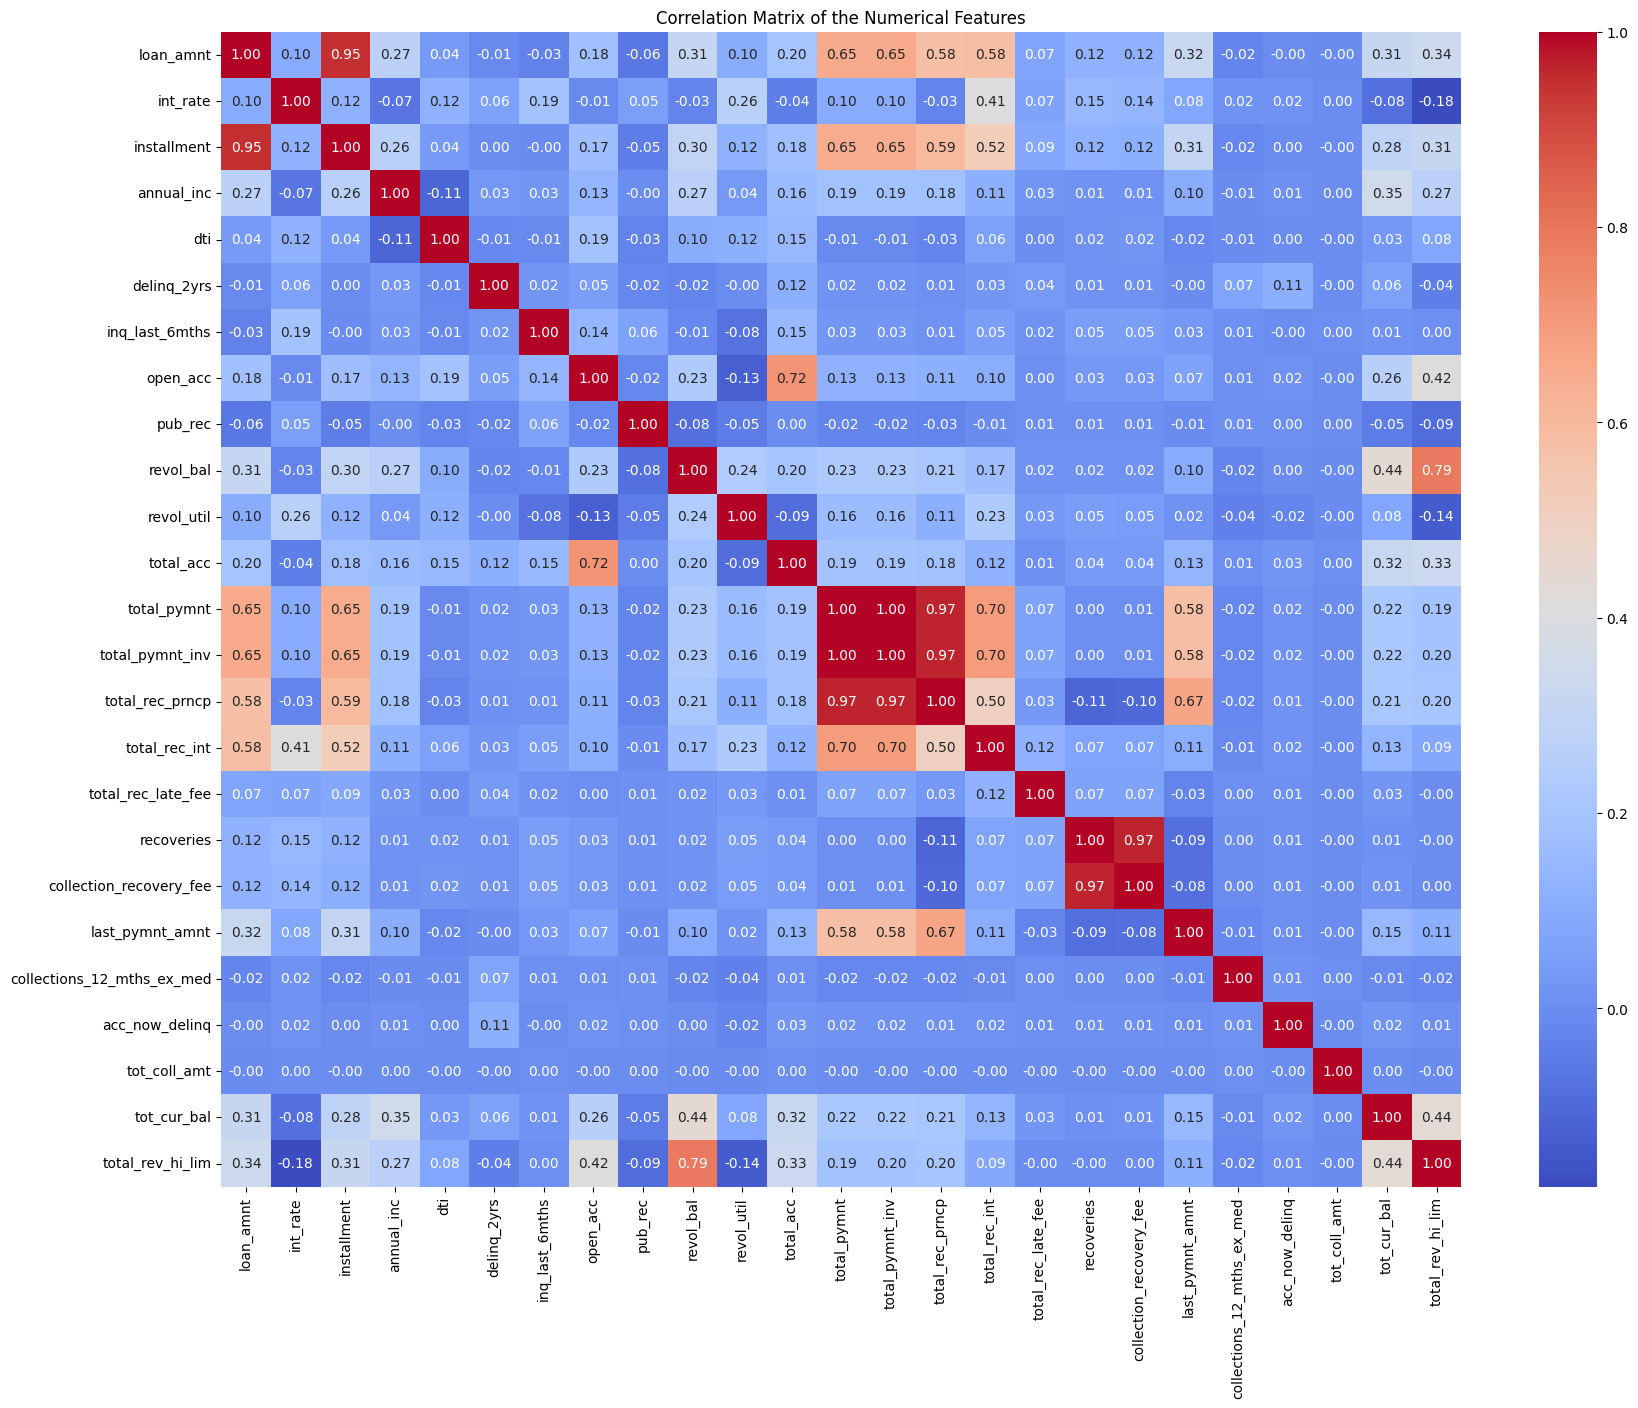

In [34]:
# Compute the correlation matrix using pearson method for numerical columns only.
X_train_df_numerical = X_train_df.loc[:,['loan_amnt', 'int_rate', 'installment','annual_inc',
                                         'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

correlation_matrix = X_train_df_numerical.corr(method='pearson')

# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the Numerical Features')
plt.show()

Above Correlation Matix Depeicts that:

total_payment

total_pymnt_inv

total_rec_prncp

total_rec_int

Are positively correlated and are redundant and any one of them can be helpful for the predection.
While recoveries and collection_recovery_fee are also postively correlated.
Hence they will not contribute much to the prediction rather add more variance.
While other features are either have no or negative corelation.

Hence, we can to drop below columns to avoid multicolinerity and improve preformance:

total_pymnt_inv

total_rec_prncp

total_rec_int

collection_recovery_fee

In [35]:
X_train_df.drop(columns=['total_pymnt_inv','total_rec_prncp','total_rec_int','collection_recovery_fee'],inplace=True)

In [36]:
correlation_matrix = X_train_df.loc[:,['grade', 'emp_length', 'home_ownership','application_type']].corrwith(y_train_df,method='spearman')
correlation_matrix_sorted = correlation_matrix.sort_values(ascending=False)

print(f'Categorical Correlated features :\n {correlation_matrix_sorted}')

Categorical Correlated features :
 grade               0.213450
home_ownership      0.048566
emp_length          0.016402
application_type   -0.052086
dtype: float64


The above data shows that the categorical data are not very corelated among each other hence there is no need to drop any of them.

In [37]:
#Finding the corelation between Independent and dependent variable using pearson method

correlation_matrix = X_train_df.corrwith(y_train_df,method='pearson')
correlation_matrix_sorted = correlation_matrix.sort_values(ascending=False)

print(f'10 most correlated features with the loan status:\n {correlation_matrix_sorted.head(10)}')

10 most correlated features with the loan status:
 recoveries            0.515068
grade                 0.225712
int_rate              0.198531
inq_last_6mths        0.101694
total_rec_late_fee    0.101600
revol_util            0.067793
home_ownership        0.046991
dti                   0.033686
pub_rec               0.029518
installment           0.024299
dtype: float64


In [38]:
print(f'10 least correlated features with the loan status:\n {correlation_matrix_sorted.tail(10)}')

10 least correlated features with the loan status:
 acc_now_delinq                0.010504
collections_12_mths_ex_med    0.003652
tot_coll_amt                 -0.000532
revol_bal                    -0.017588
annual_inc                   -0.034018
application_type             -0.052086
tot_cur_bal                  -0.055296
total_rev_hi_lim             -0.062034
total_pymnt                  -0.132885
last_pymnt_amnt              -0.175093
dtype: float64


The above Data shows 10 most and 10 least correlated features with the the dependent variable (Loan Status).

# Prepocessing the Test Data

In [39]:
test_data=test_df.copy()

In [40]:
#Dropped The columns with max missing values
test_data.drop(columns=['id','member_id','mths_since_last_delinq'],inplace=True)
# Dropped all the rows with nan values
test_data.dropna(how='any',inplace=True)


Seperating the Dependent and Independent Features

In [41]:
#Removed the dependent variables and created a label column
X_test_df = test_data.drop(columns='loan_status')
y_test_df = test_data['loan_status']
y_test_df.value_counts()
y_test_df = y_test_df.apply(lambda x: 1 if x == 'Charged Off' else 0)

In [42]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204334 entries, 0 to 226066
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   204334 non-null  int64  
 1   int_rate                    204334 non-null  float64
 2   installment                 204334 non-null  float64
 3   grade                       204334 non-null  object 
 4   emp_length                  204334 non-null  object 
 5   home_ownership              204334 non-null  object 
 6   annual_inc                  204334 non-null  float64
 7   dti                         204334 non-null  float64
 8   delinq_2yrs                 204334 non-null  float64
 9   inq_last_6mths              204334 non-null  float64
 10  open_acc                    204334 non-null  float64
 11  pub_rec                     204334 non-null  float64
 12  revol_bal                   204334 non-null  int64  
 13  revol_util         

Scaled the numerical Features and Encoded the Categorical Features

In [43]:
# Let's also look at standardising some of the numerical features

numerical_features= X_test_df.select_dtypes(include=['int64','float64']).columns
#Transform the selected columns
X_test_df[numerical_features] = scaler.transform(X_test_df[numerical_features])
obj=['grade', 'emp_length', 'home_ownership','application_type']
for col in obj:
    X_test_df[col] = label_encoders[col].transform(X_test_df[col])

Removing the highly correlated columns same columns as the train data.

In [44]:
X_test_df.drop(columns=['total_pymnt_inv','total_rec_prncp','total_rec_int','collection_recovery_fee'],inplace=True)

In [45]:
X_test_df.isna().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

# Modeling

Starting with the simple Linear regression model for prediction:

Linear Regression assumes a linear relationship between the input features and the target variable.
It works well when the data has a linear shape (i.e., the relationship can be approximated by a straight line).
Linear Regression is sensitive to outliers because it tries to minimize the sum of squared errors.
Outliers can disproportionately affect the model’s fit

Threshold of 0.5 was used to classify the data if the value of the prediction was above the theshold it was consided 1 and 0 otherwise.Same pratice was used for the regularization models as well.

In [46]:
model_lr = LinearRegression()
model_lr.fit(X_train_df, y_train_df)
y_train_pred = model_lr.predict(X_train_df)
y_test_pred = model_lr.predict(X_test_df)
# Apply threshold to predictions
threshold=0.5

y_train_pred_binary = np.where(y_train_pred >= threshold, 1, 0)
y_pred_binary = np.where(y_test_pred >= threshold, 1, 0)

mse_train = mse(y_train_df,y_train_pred_binary)
mse_test = mse(y_test_df, y_pred_binary)

print("Mean Squared Error for train:", mse_train)
print("Mean Squared Error for test:", mse_test)

Mean Squared Error for train: 0.08507400624607409
Mean Squared Error for test: 0.0817044642594967


Linear Regression Model shows the Classic Case of Overfitting where the train error is very low while the Test Error is similar.

Overfitting can be avoided using feature selection Techiques and reducing the dimentionality of the independent variables.
The MSE for the test dataset (0.081) is lower than the MSE for the training dataset (0.085) which means the model failed to learn and performs poorly on the unseen data.Generalization is not achived.

Hence we use the Regularization models which are more complex and helps in improving the performance by adding bais to the loss function.

# Ridge Regression
Ridge regession add a square penalty term to the cost function to keep overfitting under control.
Ridge regression is like a gentle guide that steers our model away from overfitting by adding  while maintaining its predictive power
Ridge regression does not promote sparsity.
This is called regularization we are trying to reduce the variance by introducing bais.

In [55]:
alpha = np.arange(0.01, 100.01, 0.01)

# Step 4: Create GridSearchCV instance
param_grid={'alpha': alpha}

ridge_grid = GridSearchCV(Ridge(),param_grid,scoring='neg_mean_squared_error')

# Step 5: Fit the grid search to the data
ridge_grid.fit(X_train_df, y_train_df)

# Step 6: Get the best model and its MSE on test data
best_ridge_model = ridge_grid.best_estimator_
y_train_pred = best_ridge_model.predict(X_train_df)
y_test_pred = best_ridge_model.predict(X_test_df)

threshold=0.5

y_train_pred_binary = np.where(y_train_pred >= threshold, 1, 0)
y_pred_binary = np.where(y_test_pred >= threshold, 1, 0)

mse_train = mse(y_train_df,y_train_pred_binary)
mse_test = mse(y_test_df, y_pred_binary)

print("Mean Squared Error for train:", mse_train)
print("Mean Squared Error for test:", mse_test)

print("Best Ridge Model:", best_ridge_model)
print("Mean Squared Error for the best Lasso model on test data:", mse_test)

Mean Squared Error for train: 0.08507400624607409
Mean Squared Error for test: 0.08169957031135298
Best Ridge Model: Ridge(alpha=10.0)
Mean Squared Error for the best Lasso model on test data: 0.08169957031135298


# Lasso Regression

Lasso Regression is also regularized linear regression that includes an L1 penalty by adding absolute penalty term to the cost function.
This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.
This penalty allows some coefficient values to go to the value of zero,
allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.

In [56]:
# Create GridSearchCV instance
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')

#  Fit the grid search to the data
lasso_grid.fit(X_train_df, y_train_df)

# Get the best model and its MSE on test data
best_lasso_model = lasso_grid.best_estimator_
y_train_pred = best_lasso_model.predict(X_train_df)
y_test_pred = best_lasso_model.predict(X_test_df)
threshold=0.5

y_train_pred_binary = np.where(y_train_pred >= threshold, 1, 0)
y_pred_binary = np.where(y_test_pred >= threshold, 1, 0)

mse_train = mse(y_train_df,y_train_pred_binary)
mse_test = mse(y_test_df, y_pred_binary)

print("Mean Squared Error for train:", mse_train)
print("Mean Squared Error for test:", mse_test)

print("Best Lasso Model:", best_ridge_model)
print("Mean Squared Error for the best Lasso model on test data:", mse_test)

Mean Squared Error for train: 0.08932505241924782
Mean Squared Error for test: 0.08565877435962689
Best Lasso Model: Ridge(alpha=10.0)
Mean Squared Error for the best Lasso model on test data: 0.08565877435962689


# Random Forest

Random Forest partitions the feature space into smaller sub-spaces based on questions asked at each node, allowing it to handle non-linearities effectively.Random Forest is an ensemble method that combines multiple decision trees to make predictions. Each tree is trained on a random subset of the data (bootstrap samples) and a random subset of features.
By aggregating the predictions of individual trees, Random Forest reduces overfitting and improves generalization. It benefits from the “wisdom of the crowd” approach. It can handle categorical and continous data.

I have used Grid Search optimatization for finding the best hyperparmeters for the model.
Although Grid Search is and exhastive Search technique and can be computationally expensive with a large number of parametes but it also allows us to evaluate the model using cross validation and all the possible combinations of the hyper parameters.

In [57]:
# Define parameter grid
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,5,7]
}

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_df, y_train_df)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train final model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_df, y_train_df)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42)

In [58]:
print(best_params)
print(best_score)

{'max_depth': 7, 'n_estimators': 300}
0.9625899089782035


In [59]:
y_train_pred = best_rf.predict(X_train_df)
y_test_pred = best_rf.predict(X_test_df)

mse_train = mse(y_train_df,y_train_pred)
mse_test = mse(y_test_df, y_test_pred)

print("MSE for Train Data:",mse_train)
print("MSE for Test Data:",mse_test)

feature_importance = best_rf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

print("Feature Importance:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {X_train_df.columns[idx]}: {feature_importance[idx]}")

MSE for Train Data: 0.03736585538480594
MSE for Test Data: 0.03754147621051807
Feature Importance:
1. recoveries: 0.8072435689329115
2. last_pymnt_amnt: 0.06211410896134911
3. grade: 0.03573453732343774
4. int_rate: 0.025189514039722277
5. total_rec_late_fee: 0.02464237732663408
6. total_pymnt: 0.01952412700721384
7. inq_last_6mths: 0.005080112081810354
8. loan_amnt: 0.005010441213289983
9. installment: 0.004258884118539777
10. application_type: 0.002598304445715676
11. total_rev_hi_lim: 0.0018722676623392717
12. revol_util: 0.0013345120312785357
13. tot_cur_bal: 0.0012021278311441297
14. dti: 0.0011632744841232948
15. total_acc: 0.0008350478868744952
16. annual_inc: 0.0007136713406988574
17. revol_bal: 0.0003935917837124129
18. open_acc: 0.0003624146972340446
19. home_ownership: 0.00023836882063459736
20. emp_length: 0.0001585790411707486
21. pub_rec: 0.0001390086735131704
22. tot_coll_amt: 8.92388375561908e-05
23. delinq_2yrs: 7.889221552702216e-05
24. acc_now_delinq: 1.6647976677828

Random Forest Model Output shows significant improvement in the results.

We also got the most relevent features for prediting if the customer will default the loan or not:

1. recoveries: 0.8072440266341678
2. last_pymnt_amnt: 0.06211425926825906
3. grade: 0.035733996683389724
4. int_rate: 0.025188560892073598
5. total_rec_late_fee: 0.024641988624110097
6. total_pymnt: 0.019523763826659078
7. inq_last_6mths: 0.005080112226582867
8. loan_amnt: 0.00501038222572717
9. installment: 0.004259634445189288
10. application_type: 0.002598304532087292



In [60]:
important_feature=['recoveries','last_pymnt_amnt','grade','int_rate','total_rec_late_fee',
          'total_pymnt','inq_last_6mths','loan_amnt','installment','application_type']

X_train_df_important = X_train_df.loc[:,important_feature]

X_test_df_important = X_test_df.loc[:,important_feature]

Performing Liner regression with the top 10 important features to check the change in the performance.

In [61]:
model = LinearRegression()
model.fit(X_train_df_important, y_train_df)
y_train_pred = model.predict(X_train_df_important)
y_test_pred = model.predict(X_test_df_important)
# Apply threshold to predictions
threshold=0.5

y_train_pred_binary = np.where(y_train_pred >= threshold, 1, 0)
y_pred_binary = np.where(y_test_pred >= threshold, 1, 0)

mse_train = mse(y_train_df,y_train_pred_binary)
mse_test = mse(y_test_df, y_pred_binary)
print("Mean Squared Error for train:", mse_train)
print("Mean Squared Error for test:", mse_test)
print(pd.Series(y_pred_binary).value_counts())
print(y_test_df.value_counts())

Mean Squared Error for train: 0.0854986685068698
Mean Squared Error for test: 0.08190022218524573
0    197813
1      6521
Name: count, dtype: int64
loan_status
0    181186
1     23148
Name: count, dtype: int64


Even after reducing the dimensionality of the Data,Linear regression model did not show much improvement.
Therefore we can conclude that the Dependent and Independent Data doesn't have Linear Relationship.

## Neural Network

The below model contains 3 layers:

Neural networks are used to generalize predition in case we have non linear relationships between Depedent and Independent feature.


1 input layer with the neurons equal to number of features and 1 hidden layer with 32 neuron and output layer with one neuron.

Hidden layer has relu as the activation function which is non linear and computationally Efficient and defined as f(x)=max(0,x) maintaining the non linear relationship between input and output.

Using Gradient Decent as optimization and loss as Mean Square error to compare the loss with other models.

Simple Neural network with one hidden layer was used keeping in mind the data size and complexity


In [64]:
# Defining the model
input_dim = X_train_df.shape[1]
output_dim=1
model = keras.Sequential([
    layers.Dense(32, input_dim=input_dim, activation='relu'),
    layers.Dense(output_dim, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='SGD',
              loss='MeanSquaredError',
              metrics=['accuracy'])

# Training the model
model.fit(X_train_df, y_train_df, epochs=20, batch_size=180, validation_split=0.2)

# Evaluating the model
loss_train, train_accuracy = model.evaluate(X_train_df, y_train_df)
loss_test, test_accuracy = model.evaluate(X_test_df, y_test_df)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Neural network MSE for Train",loss_train)
print("Neural network MSE for Test",loss_test)

Epoch 1/20
1005/1005 [==============================] - 5s 5ms/step - loss: 0.1136 - accuracy: 0.8722 - val_loss: 0.0953 - val_accuracy: 0.8928
Epoch 2/20
1005/1005 [==============================] - 3s 3ms/step - loss: 0.0858 - accuracy: 0.9047 - val_loss: 0.0782 - val_accuracy: 0.9119
Epoch 3/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.0715 - accuracy: 0.9195 - val_loss: 0.0672 - val_accuracy: 0.9240
Epoch 4/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.0628 - accuracy: 0.9288 - val_loss: 0.0606 - val_accuracy: 0.9312
Epoch 5/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.0574 - accuracy: 0.9344 - val_loss: 0.0565 - val_accuracy: 0.9345
Epoch 6/20
1005/1005 [==============================] - 6s 6ms/step - loss: 0.0540 - accuracy: 0.9378 - val_loss: 0.0539 - val_accuracy: 0.9368
Epoch 7/20
1005/1005 [==============================] - 4s 4ms/step - loss: 0.0516 - accuracy: 0.9405 - val_loss: 0.0519 - val_accuracy:

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 865 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Conclusion:**

Below is the comparision analysis of the MSE of all the models:

Linear Regression	0.085	0.0817

Ridge Regression	0.085	0.0816

Lasso Regression	0.089	0.085

Random Forest	0.0373	0.0375

Neural Network	0.042	0.041


From the above results we can conclude that Random Forest and Neural Networks work best for the prediction. Although Random Forest preforms better in terms of Accuracy but the time taken for computation as comapred to Neural Networks is very high and No explict Feature selection was required for Neural Network.

All the Linear Regression Models Preformed almost the same even regularization model did not prove benficitial.